# Setup

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import random as rd
import os
from tqdm import tqdm
import tensorflow_addons as tfa
import pandas as pd
import matplotlib.gridspec as gridspec
from matplotlib.colorbar import Colorbar


plt.style.use(['science','ieee'])

os.chdir('/home/mathis/Stage M1/')

2022-06-17 12:24:30.178243: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-17 12:24:30.178269: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Oracle

In [2]:
#GeV [min,max]

tanB_range = [2, 60]
mu_range = [-10**4, 10**4]
M1_range = M2_range = M3_range = [50, 5000]
mA_range = [50, 5000]

mQ_ii_range = mu_ii_range = md_ii_range = mL_ii_range = me_ii_range = [10**2,10**7]
ae_33_range = [-10**4,10**4]
au_ii_range = ad_ii_range = [-10**4,10**4]
mQ_23_range = [0,10**3]
md_23_range = [0,10**3]
au_ij_range = ad_ij_range = [-100,100]

NMFV_range_big= [tanB_range, mu_range, M1_range, M2_range, M3_range, mA_range, mQ_ii_range,
                 mQ_ii_range, mQ_ii_range, mu_ii_range, mu_ii_range, mu_ii_range, md_ii_range,
                 md_ii_range, md_ii_range, mL_ii_range, mL_ii_range, mL_ii_range, me_ii_range,
                 me_ii_range, me_ii_range, ae_33_range, au_ii_range, au_ii_range, au_ii_range,
                 ad_ii_range, ad_ii_range, ad_ii_range, mQ_23_range, md_23_range, au_ij_range,
                 au_ij_range, au_ij_range, au_ij_range, au_ij_range, au_ij_range, ad_ij_range,
                 ad_ij_range, ad_ij_range, ad_ij_range, ad_ij_range, ad_ij_range]


NMFV_min = np.array([i[0] for i in NMFV_range_big])
NMFV_max = np.array([i[1] for i in NMFV_range_big])

NMFV_sub = np.subtract(NMFV_max, NMFV_min)

NMFV_range = [NMFV_min,NMFV_max,NMFV_sub]

In [3]:
def write_slha(NMFV, nom_slha):
    f = open(nom_slha, "w")
    
    f.write("BLOCK MODSEL \n")
    f.write(" 1    0                               #MSSM \n")
    f.write(" 6    1                               #flavour violation \n")
                                                    
    f.write("BLOCK SMINPUTS \n")                    
    f.write("  1   1.27931417e+02                  # alpha^(-1) SM MSbar(M1) \n")
    f.write("  2   1.663900000e-05                 # G_Fermi \n")
    f.write("  3   0.119                           # alphas(MS) SM MSbar \n")
    f.write("  4   91.1876                         # MZ(pole) \n")
    f.write("  5   4.18                            # mb(mb) SM MSbar \n")
    f.write("  6   172.9                           # mtop(pole) \n")
    f.write("  7   1.776860000e+00                 # m mtau(pole) \n")
                                                      
    f.write("BLOCK MINPAR \n")                     
    f.write("  3   "+str(NMFV[0])+"                # tanb \n")
    f.write("  4   1                               # sign mu \n")
                                                   
    f.write("BLOCK EXTPAR \n")                    
    f.write("  0    "+str(-1.0)+"                  # Q \n")
    f.write("  1    "+str(NMFV[2])+"               # M1 \n")
    f.write("  2    "+str(NMFV[3])+"               # M2 \n")
    f.write("  3    "+str(NMFV[4])+"               # M3 \n")
    f.write("  23   "+str(NMFV[1])+"               # mu \n")
    f.write("  26   "+str(NMFV[5])+"               # mA \n")
    f.write("  25   "+str(NMFV[0])+"               # tanb \n")
    
    f.write("BLOCK MSQ2IN \n")                            
    f.write("  1  1    "+str(NMFV[6])+"            # mq2_11 \n")
    f.write("  2  1    "+str(0)+"                  # mq2_12 \n")
    f.write("  3  1    "+str(0)+"                  # mq2_13 \n")
    f.write("  1  2    "+str(0)+"                  # mq2_21 \n")
    f.write("  2  2    "+str(NMFV[7])+"            # mq2_22 \n")
    f.write("  3  2    "+str(0)+"                  # mq2_23 \n")
    f.write("  1  3    "+str(0)+"                  # mq2_31 \n")
    f.write("  2  3    "+str(NMFV[28])+"           # mq2_32 \n")
    f.write("  3  3    "+str(NMFV[8])+"            # mq2_33 \n")
    
    f.write("BLOCK MSU2IN \n")                            
    f.write("  1  1    "+str(NMFV[9])+"            # mu2_11 \n")
    f.write("  2  1    "+str(0)+"                  # mu2_12 \n")
    f.write("  3  1    "+str(0)+"                  # mu2_13 \n")
    f.write("  1  2    "+str(0)+"                  # mu2_21 \n")
    f.write("  2  2    "+str(NMFV[10])+"           # mu2_22 \n")
    f.write("  3  2    "+str(0)+"                  # mu2_23 \n")
    f.write("  1  3    "+str(0)+"                  # mu2_31 \n")
    f.write("  2  3    "+str(0)+"                  # mu2_32 \n")
    f.write("  3  3    "+str(NMFV[11])+"           # mu2_33 \n")
    
    f.write("BLOCK MSD2IN \n")                            
    f.write("  1  1    "+str(NMFV[12])+"           # md2_11 \n")
    f.write("  2  1    "+str(0)+"                  # md2_12 \n")
    f.write("  3  1    "+str(0)+"                  # md2_13 \n")
    f.write("  1  2    "+str(0)+"                  # md2_21 \n")
    f.write("  2  2    "+str(NMFV[13])+"           # md2_22 \n")
    f.write("  3  2    "+str(0)+"                  # md2_23 \n")
    f.write("  1  3    "+str(0)+"                  # md2_31 \n")
    f.write("  2  3    "+str(NMFV[29])+"           # md2_32 \n")
    f.write("  3  3    "+str(NMFV[14])+"           # md2_33 \n")
    
    f.write("BLOCK MSL2IN \n")                            
    f.write("  1  1    "+str(NMFV[15])+"           # ml2_11 \n")
    f.write("  2  1    "+str(0)+"                  # ml2_12 \n")
    f.write("  3  1    "+str(0)+"                  # ml2_13 \n")
    f.write("  1  2    "+str(0)+"                  # ml2_21 \n")
    f.write("  2  2    "+str(NMFV[16])+"           # ml2_22 \n")
    f.write("  3  2    "+str(0)+"                  # ml2_23 \n")
    f.write("  1  3    "+str(0)+"                  # ml2_31 \n")
    f.write("  2  3    "+str(0)+"                  # ml2_32 \n")
    f.write("  3  3    "+str(NMFV[17])+"           # ml2_33 \n")
    
    f.write("BLOCK MSE2IN \n")                            
    f.write("  1  1    "+str(NMFV[18])+"           # me2_11 \n")
    f.write("  2  1    "+str(0)+"                  # me2_12 \n")
    f.write("  3  1    "+str(0)+"                  # me2_13 \n")
    f.write("  1  2    "+str(0)+"                  # me2_21 \n")
    f.write("  2  2    "+str(NMFV[19])+"           # me2_22 \n")
    f.write("  3  2    "+str(0)+"                  # me2_23 \n")
    f.write("  1  3    "+str(0)+"                  # me2_31 \n")
    f.write("  2  3    "+str(0)+"                  # me2_32 \n")
    f.write("  3  3    "+str(NMFV[20])+"           # me2_33 \n")
    
    f.write("BLOCK TEIN \n")                            
    f.write("  1  1    "+str(0)+"                  # T_e_11 \n")
    f.write("  2  1    "+str(0)+"                  # T_e_21 \n")
    f.write("  3  1    "+str(0)+"                  # T_e_31 \n")
    f.write("  1  2    "+str(0)+"                  # T_e_12 \n")
    f.write("  2  2    "+str(0)+"                  # T_e_22 \n")
    f.write("  3  2    "+str(0)+"                  # T_e_32 \n")
    f.write("  1  3    "+str(0)+"                  # T_e_13 \n")
    f.write("  2  3    "+str(0)+"                  # T_e_23 \n")
    f.write("  3  3    "+str(NMFV[21])+"           # T_e_33 \n")
    
    f.write("BLOCK TUIN \n")                            
    f.write("  1  1    "+str(NMFV[22])+"           # T_u_11 \n")
    f.write("  2  1    "+str(NMFV[30])+"           # T_u_21 \n")
    f.write("  3  1    "+str(NMFV[31])+"           # T_u_31 \n")
    f.write("  1  2    "+str(NMFV[32])+"           # T_u_12 \n")
    f.write("  2  2    "+str(NMFV[23])+"           # T_u_22 \n")
    f.write("  3  2    "+str(NMFV[33])+"           # T_u_32 \n")
    f.write("  1  3    "+str(NMFV[34])+"           # T_u_13 \n")
    f.write("  2  3    "+str(NMFV[35])+"           # T_u_23 \n")
    f.write("  3  3    "+str(NMFV[24])+"           # T_u_33 \n")
    
    f.write("BLOCK TDIN \n")                            
    f.write("  1  1    "+str(NMFV[25])+"           # T_d_11 \n")
    f.write("  2  1    "+str(NMFV[36])+"           # T_d_21 \n")
    f.write("  3  1    "+str(NMFV[37])+"           # T_d_31 \n")
    f.write("  1  2    "+str(NMFV[38])+"           # T_d_12 \n")
    f.write("  2  2    "+str(NMFV[26])+"           # T_d_22 \n")
    f.write("  3  2    "+str(NMFV[39])+"           # T_d_32 \n")
    f.write("  1  3    "+str(NMFV[40])+"           # T_d_13 \n")
    f.write("  2  3    "+str(NMFV[41])+"           # T_d_23 \n")
    f.write("  3  3    "+str(NMFV[27])+"           # T_d_33 \n")
    
    f.close()

In [4]:
def Oracle(logits, NMFV_range, ratio, succes_path):
    
    NMFV_AL = np.add(np.multiply(logits,NMFV_range[2]),NMFV_range[0])
    
    write_slha(NMFV_AL, "Advanced NN/NMFV/nmfv_al.in")    
    
    os.system('./SUSY/softsusy-4.1.9/softpoint.x leshouches < Advanced\ NN/NMFV/nmfv_al.in > Advanced\ NN/NMFV/nmfv_al.out')
            
          
    if os.path.getsize('/home/mathis/Stage M1/Advanced NN/NMFV/nmfv_al.out') == 0 :
        ratio[0]+=1
        return 0
        
    with open('Advanced NN/NMFV/nmfv_al.out') as slha_out:
        content = slha_out.read()
        if 'SOFTSUSY problem' in content:
            ratio[0]+=1
            return 0
        if 'LSP # Warning' in content:
            ratio[0]+=1
            return 0
    
    
    
    ratio[1]+=1
    commande = 'mv Advanced\ NN/NMFV/nmfv_al.out '
    nom_fichier = 'nmfv_al_succes_'+str(ratio[1])+'.out'
    os.system(commande+succes_path+nom_fichier)
    return 1   

# Model

In [5]:
path = 'Advanced NN/NMFV/NMFV_run/'
folder_r = '2022-06-15-17:39:01_II'

discriminator = tf.keras.models.load_model(path+folder_r+'/model_II.h5')
discriminator.summary()


fnc_activation = 'relu'
fnc_activation_output = 'sigmoid'
inputs = tf.keras.Input(shape=(25,), dtype='float32')
x = keras.layers.Dense(100, trainable=True, activation=fnc_activation)(inputs)
x = keras.layers.Dense(100, trainable=True, activation=fnc_activation)(x)
x = keras.layers.Dense(100, trainable=True, activation=fnc_activation)(x)
outputs = keras.layers.Dense(42, activation=fnc_activation_output)(x)
generator = tf.keras.Model(inputs,outputs)
generator.summary()


lr = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)


loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False, reduction='sum_over_batch_size')
#False pour une probabilité ie [0;1]

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 42)]              0         
                                                                 
 dense (Dense)               (None, 100)               4300      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 14,501
Trainable params: 14,501
Non-trainable params: 0
_________________________________________________________________
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25)] 

2022-06-17 12:24:34.520800: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-17 12:24:34.520853: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-17 12:24:34.520878: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (MPC): /proc/driver/nvidia/version does not exist
2022-06-17 12:24:34.521271: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Initial training

In [6]:
os.chdir('/home/mathis/Stage M1/')
os.system('rm -r Advanced\ NN/NMFV/softsusy_succes/')
os.system('mkdir -p Advanced\ NN/NMFV/softsusy_succes')
succes_path = 'Advanced\ NN/NMFV/softsusy_succes/'

ratio = [0,0]


K_size = 100
train_step = 500


loss_evolution_d = []
loss_evolution_g = []

for step , i in enumerate(range(train_step)):
    print('Step {} / {}'.format(i+1,train_step))
    
    batch = [[rd.uniform(0,1) for j in range(25)] for k in range(K_size)]
    batch = tf.convert_to_tensor(batch)
    
    
    with tf.GradientTape(persistent=True) as tape:
        logits_g = generator(batch)
    
        pred_g = []
        for j in tqdm(logits_g):
            pred = Oracle(j, NMFV_range, ratio, succes_path)
            pred_g.append(pred)
    

        logits_d = discriminator(logits_g)
        
        
        true = tf.convert_to_tensor([pred_g])
        true = tf.transpose(true)      
        true_prime = tf.cast(true, dtype=tf.float32)

        loss_d = loss_fn(true_prime,logits_d)
        loss_evolution_d.append(loss_d)
        
        gradients_d = tape.gradient(loss_d, discriminator.trainable_weights)
        optimizer.apply_gradients(zip(gradients_d, discriminator.trainable_weights))
    

        loss_g = tf.math.abs(tf.math.subtract(1,loss_d))
        loss_evolution_g.append(loss_g)
        
        gradients_g = tape.gradient(loss_g, generator.trainable_weights)
        optimizer.apply_gradients(zip(gradients_g, generator.trainable_weights))
    
    
print("Nombre d'échecs:",ratio[0])
print("Nombre de succes:",ratio[1])

Step 1 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 16.98it/s]

Step 2 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.53it/s]


Step 3 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.57it/s]


Step 4 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.21it/s]


Step 5 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.74it/s]


Step 6 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.61it/s]


Step 7 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.90it/s]


Step 8 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.64it/s]


Step 9 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.52it/s]


Step 10 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.56it/s]


Step 11 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 16.76it/s]


Step 12 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.75it/s]


Step 13 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 14.11it/s]


Step 14 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.65it/s]


Step 15 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.34it/s]


Step 16 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.29it/s]


Step 17 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.30it/s]


Step 18 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.96it/s]


Step 19 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 12.34it/s]


Step 20 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.55it/s]


Step 21 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.05it/s]


Step 22 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 16.05it/s]


Step 23 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.67it/s]


Step 24 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.82it/s]


Step 25 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.05it/s]


Step 26 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.95it/s]


Step 27 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.50it/s]


Step 28 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.85it/s]


Step 29 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.66it/s]


Step 30 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.54it/s]


Step 31 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.80it/s]


Step 32 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.22it/s]


Step 33 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.64it/s]


Step 34 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.84it/s]


Step 35 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.26it/s]


Step 36 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.56it/s]


Step 37 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.74it/s]


Step 38 / 500


100%|█████████████████████████████████████████| 100/100 [00:04<00:00, 20.36it/s]


Step 39 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.40it/s]


Step 40 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.29it/s]


Step 41 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.54it/s]


Step 42 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.22it/s]


Step 43 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.61it/s]


Step 44 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 16.46it/s]


Step 45 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.25it/s]


Step 46 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.77it/s]


Step 47 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.13it/s]


Step 48 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.93it/s]


Step 49 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 16.81it/s]


Step 50 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.61it/s]


Step 51 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.32it/s]


Step 52 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.23it/s]


Step 53 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.17it/s]


Step 54 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.09it/s]


Step 55 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.26it/s]


Step 56 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.83it/s]


Step 57 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.90it/s]


Step 58 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.61it/s]


Step 59 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.33it/s]


Step 60 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.81it/s]


Step 61 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.53it/s]


Step 62 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.50it/s]


Step 63 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 16.91it/s]


Step 64 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.02it/s]


Step 65 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.37it/s]


Step 66 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.46it/s]


Step 67 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.09it/s]


Step 68 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.42it/s]


Step 69 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.91it/s]


Step 70 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.48it/s]


Step 71 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.21it/s]


Step 72 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.93it/s]


Step 73 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.19it/s]


Step 74 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.75it/s]


Step 75 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.51it/s]


Step 76 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.63it/s]


Step 77 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 16.46it/s]


Step 78 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.97it/s]


Step 79 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 16.74it/s]


Step 80 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.50it/s]


Step 81 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.11it/s]


Step 82 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 16.56it/s]


Step 83 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.14it/s]


Step 84 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 16.80it/s]


Step 85 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.90it/s]


Step 86 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.35it/s]


Step 87 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.16it/s]


Step 88 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.42it/s]


Step 89 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.51it/s]


Step 90 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.95it/s]


Step 91 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.40it/s]


Step 92 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.69it/s]


Step 93 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 12.29it/s]


Step 94 / 500


100%|█████████████████████████████████████████| 100/100 [00:09<00:00, 10.11it/s]


Step 95 / 500


100%|█████████████████████████████████████████| 100/100 [00:09<00:00, 10.96it/s]


Step 96 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.37it/s]


Step 97 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.83it/s]


Step 98 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.38it/s]


Step 99 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.37it/s]


Step 100 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.78it/s]


Step 101 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.75it/s]


Step 102 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 14.23it/s]


Step 103 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.72it/s]


Step 104 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 12.90it/s]


Step 105 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 12.92it/s]


Step 106 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 16.82it/s]


Step 107 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.14it/s]


Step 108 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.99it/s]


Step 109 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.16it/s]


Step 110 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.35it/s]


Step 111 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.22it/s]


Step 112 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.69it/s]


Step 113 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.37it/s]


Step 114 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.22it/s]


Step 115 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 14.17it/s]


Step 116 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.59it/s]


Step 117 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.72it/s]


Step 118 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.69it/s]


Step 119 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 16.71it/s]


Step 120 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.52it/s]


Step 121 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.62it/s]


Step 122 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 14.11it/s]


Step 123 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 11.95it/s]


Step 124 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 11.81it/s]


Step 125 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 12.82it/s]


Step 126 / 500


100%|█████████████████████████████████████████| 100/100 [00:09<00:00, 10.79it/s]


Step 127 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 11.43it/s]


Step 128 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 11.89it/s]


Step 129 / 500


100%|█████████████████████████████████████████| 100/100 [00:10<00:00,  9.99it/s]


Step 130 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 12.25it/s]


Step 131 / 500


100%|█████████████████████████████████████████| 100/100 [00:09<00:00, 10.57it/s]


Step 132 / 500


100%|█████████████████████████████████████████| 100/100 [00:09<00:00, 10.53it/s]


Step 133 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 11.87it/s]


Step 134 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 11.54it/s]


Step 135 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 12.56it/s]


Step 136 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 11.79it/s]


Step 137 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 12.01it/s]


Step 138 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.32it/s]


Step 139 / 500


100%|█████████████████████████████████████████| 100/100 [00:09<00:00, 11.10it/s]


Step 140 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.21it/s]


Step 141 / 500


100%|█████████████████████████████████████████| 100/100 [00:09<00:00, 10.71it/s]


Step 142 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 12.28it/s]


Step 143 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 12.04it/s]


Step 144 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 12.85it/s]


Step 145 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.65it/s]


Step 146 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 12.94it/s]


Step 147 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 12.72it/s]


Step 148 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 14.25it/s]


Step 149 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 12.69it/s]


Step 150 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 12.14it/s]


Step 151 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Step 152 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.60it/s]


Step 153 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.24it/s]


Step 154 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 12.13it/s]


Step 155 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 11.17it/s]


Step 156 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 12.14it/s]


Step 157 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.41it/s]


Step 158 / 500


100%|█████████████████████████████████████████| 100/100 [00:09<00:00, 10.38it/s]


Step 159 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 12.56it/s]


Step 160 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 11.83it/s]


Step 161 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 11.50it/s]


Step 162 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 12.88it/s]


Step 163 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.02it/s]


Step 164 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 12.25it/s]


Step 165 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 12.23it/s]


Step 166 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.89it/s]


Step 167 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.28it/s]


Step 168 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.96it/s]


Step 169 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 12.39it/s]


Step 170 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 12.50it/s]


Step 171 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 11.45it/s]


Step 172 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.13it/s]


Step 173 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.21it/s]


Step 174 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 12.02it/s]


Step 175 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 11.79it/s]


Step 176 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 11.28it/s]


Step 177 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.46it/s]


Step 178 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 12.51it/s]


Step 179 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 12.64it/s]


Step 180 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.18it/s]


Step 181 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Step 182 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 12.29it/s]


Step 183 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.91it/s]


Step 184 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 12.07it/s]


Step 185 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Step 186 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 12.13it/s]


Step 187 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.93it/s]


Step 188 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 12.50it/s]


Step 189 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 11.40it/s]


Step 190 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 11.46it/s]


Step 191 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.70it/s]


Step 192 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 12.62it/s]


Step 193 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.83it/s]


Step 194 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 12.37it/s]


Step 195 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.37it/s]


Step 196 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.20it/s]


Step 197 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.62it/s]


Step 198 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 11.32it/s]


Step 199 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 12.85it/s]


Step 200 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.97it/s]


Step 201 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.01it/s]


Step 202 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 12.18it/s]


Step 203 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 14.27it/s]


Step 204 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 16.27it/s]


Step 205 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 11.49it/s]


Step 206 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 11.27it/s]


Step 207 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 12.81it/s]


Step 208 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 11.94it/s]


Step 209 / 500


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 11.81it/s]


Step 210 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.69it/s]


Step 211 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.13it/s]


Step 212 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 16.80it/s]


Step 213 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.33it/s]


Step 214 / 500


100%|█████████████████████████████████████████| 100/100 [00:04<00:00, 20.93it/s]


Step 215 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.69it/s]


Step 216 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.32it/s]


Step 217 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.52it/s]


Step 218 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 16.70it/s]


Step 219 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.68it/s]


Step 220 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.07it/s]


Step 221 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.86it/s]


Step 222 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.51it/s]


Step 223 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 16.49it/s]


Step 224 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.61it/s]


Step 225 / 500


100%|█████████████████████████████████████████| 100/100 [00:04<00:00, 20.70it/s]


Step 226 / 500


100%|█████████████████████████████████████████| 100/100 [00:04<00:00, 20.32it/s]


Step 227 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.24it/s]


Step 228 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.76it/s]


Step 229 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.58it/s]


Step 230 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 16.92it/s]


Step 231 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.27it/s]


Step 232 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.78it/s]


Step 233 / 500


100%|█████████████████████████████████████████| 100/100 [00:04<00:00, 20.07it/s]


Step 234 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.98it/s]


Step 235 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.89it/s]


Step 236 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.42it/s]


Step 237 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.99it/s]


Step 238 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.08it/s]


Step 239 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.05it/s]


Step 240 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.73it/s]


Step 241 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.89it/s]


Step 242 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.21it/s]


Step 243 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.97it/s]


Step 244 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.45it/s]


Step 245 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.46it/s]


Step 246 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.43it/s]


Step 247 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.27it/s]


Step 248 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.96it/s]


Step 249 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.67it/s]


Step 250 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.50it/s]


Step 251 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.88it/s]


Step 252 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.84it/s]


Step 253 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.23it/s]


Step 254 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.78it/s]


Step 255 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.07it/s]


Step 256 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.07it/s]


Step 257 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.58it/s]


Step 258 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.81it/s]


Step 259 / 500


100%|█████████████████████████████████████████| 100/100 [00:04<00:00, 20.25it/s]


Step 260 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.01it/s]


Step 261 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.18it/s]


Step 262 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.34it/s]


Step 263 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.08it/s]


Step 264 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.86it/s]


Step 265 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 19.22it/s]


Step 266 / 500


100%|█████████████████████████████████████████| 100/100 [00:04<00:00, 20.16it/s]


Step 267 / 500


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.54it/s]


Step 268 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.95it/s]


Step 269 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.43it/s]


Step 270 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.34it/s]


Step 271 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.33it/s]


Step 272 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.28it/s]


Step 273 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.54it/s]


Step 274 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.46it/s]


Step 275 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.48it/s]


Step 276 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.44it/s]


Step 277 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.45it/s]


Step 278 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.71it/s]


Step 279 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.58it/s]


Step 280 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.69it/s]


Step 281 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.48it/s]


Step 282 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.92it/s]


Step 283 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.75it/s]


Step 284 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.32it/s]


Step 285 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.75it/s]


Step 286 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.75it/s]


Step 287 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.06it/s]


Step 288 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.15it/s]


Step 289 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.37it/s]


Step 290 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.67it/s]


Step 291 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.29it/s]


Step 292 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.72it/s]


Step 293 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.43it/s]


Step 294 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.58it/s]


Step 295 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.91it/s]


Step 296 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.64it/s]


Step 297 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.66it/s]


Step 298 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.72it/s]


Step 299 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 14.04it/s]


Step 300 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.79it/s]


Step 301 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.90it/s]


Step 302 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.83it/s]


Step 303 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.81it/s]


Step 304 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.13it/s]


Step 305 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.88it/s]


Step 306 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.25it/s]


Step 307 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.68it/s]


Step 308 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.73it/s]


Step 309 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.77it/s]


Step 310 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.22it/s]


Step 311 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.78it/s]


Step 312 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.46it/s]


Step 313 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.69it/s]


Step 314 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.72it/s]


Step 315 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.49it/s]


Step 316 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.59it/s]


Step 317 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.66it/s]


Step 318 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.78it/s]


Step 319 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.80it/s]


Step 320 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.75it/s]


Step 321 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.10it/s]


Step 322 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.69it/s]


Step 323 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.74it/s]


Step 324 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.69it/s]


Step 325 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.66it/s]


Step 326 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.79it/s]


Step 327 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.50it/s]


Step 328 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.60it/s]


Step 329 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.75it/s]


Step 330 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.70it/s]


Step 331 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.62it/s]


Step 332 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.48it/s]


Step 333 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.45it/s]


Step 334 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.87it/s]


Step 335 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.70it/s]


Step 336 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.77it/s]


Step 337 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.75it/s]


Step 338 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.86it/s]


Step 339 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.92it/s]


Step 340 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.65it/s]


Step 341 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.90it/s]


Step 342 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.94it/s]


Step 343 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.61it/s]


Step 344 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.25it/s]


Step 345 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.15it/s]


Step 346 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.82it/s]


Step 347 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.71it/s]


Step 348 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.01it/s]


Step 349 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.91it/s]


Step 350 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.66it/s]


Step 351 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.90it/s]


Step 352 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.69it/s]


Step 353 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.66it/s]


Step 354 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.88it/s]


Step 355 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.37it/s]


Step 356 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.26it/s]


Step 357 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.51it/s]


Step 358 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.10it/s]


Step 359 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.52it/s]


Step 360 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.48it/s]


Step 361 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.63it/s]


Step 362 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.99it/s]


Step 363 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.95it/s]


Step 364 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.61it/s]


Step 365 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.55it/s]


Step 366 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.08it/s]


Step 367 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 14.27it/s]


Step 368 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.38it/s]


Step 369 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.35it/s]


Step 370 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.15it/s]


Step 371 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.37it/s]


Step 372 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.51it/s]


Step 373 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.28it/s]


Step 374 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.05it/s]


Step 375 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.31it/s]


Step 376 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.63it/s]


Step 377 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.55it/s]


Step 378 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 14.01it/s]


Step 379 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.38it/s]


Step 380 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.49it/s]


Step 381 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.99it/s]


Step 382 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.47it/s]


Step 383 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.46it/s]


Step 384 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.29it/s]


Step 385 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.58it/s]


Step 386 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.46it/s]


Step 387 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.23it/s]


Step 388 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.95it/s]


Step 389 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.04it/s]


Step 390 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.16it/s]


Step 391 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.30it/s]


Step 392 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.42it/s]


Step 393 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.30it/s]


Step 394 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.58it/s]


Step 395 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.40it/s]


Step 396 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.56it/s]


Step 397 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.53it/s]


Step 398 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.43it/s]


Step 399 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.52it/s]


Step 400 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.24it/s]


Step 401 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.91it/s]


Step 402 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.04it/s]


Step 403 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.85it/s]


Step 404 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 14.26it/s]


Step 405 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 14.24it/s]


Step 406 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.16it/s]


Step 407 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.65it/s]


Step 408 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.41it/s]


Step 409 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 16.06it/s]


Step 410 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.65it/s]


Step 411 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.11it/s]


Step 412 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.85it/s]


Step 413 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.59it/s]


Step 414 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.90it/s]


Step 415 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.54it/s]


Step 416 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.80it/s]


Step 417 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.88it/s]


Step 418 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.70it/s]


Step 419 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.50it/s]


Step 420 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.69it/s]


Step 421 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.83it/s]


Step 422 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.79it/s]


Step 423 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.43it/s]


Step 424 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.84it/s]


Step 425 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.10it/s]


Step 426 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.10it/s]


Step 427 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.71it/s]


Step 428 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.74it/s]


Step 429 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.70it/s]


Step 430 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.48it/s]


Step 431 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.69it/s]


Step 432 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.88it/s]


Step 433 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.72it/s]


Step 434 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.61it/s]


Step 435 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.64it/s]


Step 436 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.72it/s]


Step 437 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.60it/s]


Step 438 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.83it/s]


Step 439 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.47it/s]


Step 440 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.17it/s]


Step 441 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.82it/s]


Step 442 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.63it/s]


Step 443 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.86it/s]


Step 444 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.84it/s]


Step 445 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.69it/s]


Step 446 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.63it/s]


Step 447 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.73it/s]


Step 448 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.68it/s]


Step 449 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.79it/s]


Step 450 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.73it/s]


Step 451 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.60it/s]


Step 452 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.50it/s]


Step 453 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.53it/s]


Step 454 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.33it/s]


Step 455 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.52it/s]


Step 456 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.36it/s]


Step 457 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.56it/s]


Step 458 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.72it/s]


Step 459 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.42it/s]


Step 460 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.75it/s]


Step 461 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.89it/s]


Step 462 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.41it/s]


Step 463 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.67it/s]


Step 464 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.59it/s]


Step 465 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.67it/s]


Step 466 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.55it/s]


Step 467 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.46it/s]


Step 468 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.54it/s]


Step 469 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.28it/s]


Step 470 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.51it/s]


Step 471 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.20it/s]


Step 472 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.53it/s]


Step 473 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.59it/s]


Step 474 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.25it/s]


Step 475 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.50it/s]


Step 476 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.52it/s]


Step 477 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.78it/s]


Step 478 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.90it/s]


Step 479 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.79it/s]


Step 480 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.69it/s]


Step 481 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.71it/s]


Step 482 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.85it/s]


Step 483 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.11it/s]


Step 484 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.73it/s]


Step 485 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.68it/s]


Step 486 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.74it/s]


Step 487 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.75it/s]


Step 488 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.05it/s]


Step 489 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.45it/s]


Step 490 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.72it/s]


Step 491 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.52it/s]


Step 492 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.75it/s]


Step 493 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.71it/s]


Step 494 / 500


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.99it/s]


Step 495 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.46it/s]


Step 496 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.51it/s]


Step 497 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.75it/s]


Step 498 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.41it/s]


Step 499 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.47it/s]


Step 500 / 500


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.75it/s]

Nombre d'échecs: 2498
Nombre de succes: 47502


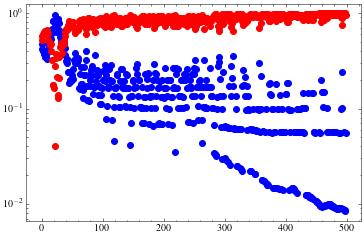

In [7]:
plt.plot([i for i in range(train_step)],loss_evolution_d,'ob')
plt.plot([i for i in range(train_step)],loss_evolution_g,'or')
plt.yscale("log")

# Récupération data

In [8]:
def recuperation_slha(folder,filename,sus_mass,param,ms2_param,t_param,succes):
    warning = 0
    for j in range(succes):
        file_name =folder+filename+str(j+1)+'.out' 
        
        with open(file_name) as file:
            for indice, ligne in enumerate(file):
                if 'tanb' in ligne:
                    indice_tanb = indice
                
                if 'M_1(MX)' in ligne:
                    indices_M = [indice+i for i in range(3)]
                if 'mu(MX)' in ligne:
                    indice_mu = indice
                if 'mA(pole)' in ligne:
                    indice_mA = indice
                    
                if 'MW' in ligne:
                    indices_masses = [indice+i for i in range(33)]
                    
                if 'input (mhat_Q^2)_{1,1}' in ligne:
                    indices_msq2 = [indice, indice+3, indice+4, indice+5]
                if 'input (mhat_u^2)_{1,1}' in ligne:
                    indices_msu2 = [indice, indice+3, indice+5]
                if 'input (mhat_d^2)_{1,1}' in ligne:
                    indices_msd2 = [indice, indice+3, indice+4, indice+5]
                if 'Block MSL2IN' in ligne:
                    indices_msl2 = [indice+1, indice+4, indice+6]
                if 'Block MSE2IN' in ligne:
                    indices_mse2 = [indice+1, indice+4, indice+6]
                    
                if 'input (That_U)_{1,1}' in ligne:
                    indices_tu = [indice+i for i in range(9)]
                if 'input (That_D)_{1,1}' in ligne:
                    indices_td = [indice+i for i in range(9)]
                if 'input (That_E)_{3,3}' in ligne:
                    indice_te = indice
        
        
        file = open(file_name)
        lignes = file.readlines()
        
        
        param[0].append(float(lignes[indice_tanb].split()[1]))
        
        for step, i in enumerate(param[1]):
            i.append(float(lignes[indices_M[step]].split()[1]))
            
        param[2].append(float(lignes[indice_mu].split()[1]))
        
        param[3].append(float(lignes[indice_mA].split()[1]))
            
        
            
        
        sus_mass[0].append(float(lignes[indices_masses[0]].split()[1]))
        
        for step, i in enumerate(sus_mass[1]):
            i.append(float(lignes[indices_masses[step+1]].split()[1]))
        
        sus_mass[2].append(float(lignes[indices_masses[5]].split()[1]))
        
        sus_mass[3][0].append(float(lignes[indices_masses[6]].split()[1]))
        sus_mass[3][1].append(float(lignes[indices_masses[7]].split()[1]))
        sus_mass[3][2].append(float(lignes[indices_masses[9]].split()[1]))
        sus_mass[3][3].append(float(lignes[indices_masses[10]].split()[1]))
        
        sus_mass[4][0].append(float(lignes[indices_masses[8]].split()[1]))
        sus_mass[4][1].append(float(lignes[indices_masses[11]].split()[1]))
        
        for step, i in enumerate(sus_mass[5]):
            i.append(float(lignes[indices_masses[step+12]].split()[1]))
        
        for step, i in enumerate(sus_mass[6]):
            i.append(float(lignes[indices_masses[step+18]].split()[1]))

        for step, i in enumerate(sus_mass[7]):
            i.append(float(lignes[indices_masses[step+21]].split()[1]))        
        
        for step, i in enumerate(sus_mass[8]):
            i.append(float(lignes[indices_masses[step+27]].split()[1]))
            
            
            
        for step, i in enumerate(ms2_param[0]):
            i.append(float(lignes[indices_msq2[step]].split()[2]))
        for step, i in enumerate(ms2_param[1]):
            i.append(float(lignes[indices_msu2[step]].split()[2]))    
        for step, i in enumerate(ms2_param[2]):
            i.append(float(lignes[indices_msd2[step]].split()[2]))
        for step, i in enumerate(ms2_param[3]):
            i.append(float(lignes[indices_msl2[step]].split()[2]))
        for step, i in enumerate(ms2_param[4]):
            i.append(float(lignes[indices_mse2[step]].split()[2])) 
            
            
            
        for step, i in enumerate(t_param[0]):
            i.append(float(lignes[indices_tu[step]].split()[2]))
        for step, i in enumerate(t_param[1]):
            i.append(float(lignes[indices_td[step]].split()[2])) 
        t_param[2].append(float(lignes[indice_te].split()[2]))
    
    
    
        with open(file_name) as file:
            if 'LSP # Warning' in file.read():
                warning+=1
    return warning

In [9]:
MW_mass = []
higgs_mass = [[] for i in range(4)]        #[h0 , H0 , A0 , H+]
g_mass = []
neutralino_mass = [[] for i in range(4)]   #[N1 , N2 , N3 , N4]
chargino_mass = [[] for i in range(2)]     #[neutralino1 , neutralino2]     
e_mass = [[] for i in range(6)]
nu_mass = [[] for i in range(3)]
d_mass = [[] for i in range(6)]
u_mass = [[] for i in range(6)]

sus_mass = [MW_mass,higgs_mass,g_mass,neutralino_mass,chargino_mass,e_mass,nu_mass,d_mass,u_mass]


tanB_param = []
M_param = [[] for i in range(3)]           #[M1 , M2 , M3
mu_param = []
mA_param = []

param = [tanB_param,M_param,mu_param,mA_param]


msq2_param = [[] for i in range(4)]
msu2_param = [[] for i in range(3)]
msd2_param = [[] for i in range(4)]
msl2_param = [[] for i in range(3)]
mse2_param = [[] for i in range(3)]

ms2_param = [msq2_param,msu2_param,msd2_param,msl2_param,mse2_param]


tu_param = [[] for i in range(9)]
td_param = [[] for i in range(9)]
te_param = []

t_param = [tu_param,td_param,te_param]

folder = 'Advanced NN/NMFV/softsusy_succes/'
file_name = 'nmfv_al_succes_'
warning = recuperation_slha(folder,file_name,sus_mass,param,ms2_param,t_param,ratio[1])

print('Nombre warning:',warning)

Nombre warning: 0


# Sauvegarde Run

In [10]:
from datetime import date, datetime

folder_name = 'GAN_'+str(date.today())+'-'+str(datetime.now().time().strftime("%H:%M:%S"))
commande = 'mkdir -p Advanced\ NN/NMFV/NMFV_run/'+folder_name
os.system(commande)

with open('Advanced NN/NMFV/NMFV_run/'+folder_name+'/config.txt', 'w') as f:
    f.write('K: '+str(K_size)+'\n')
    f.write('train steps: '+str(train_step)+'\n')
    f.write("Nombre d'échecs: "+str(ratio[0])+'\n')
    f.write("Nombre de succes: "+str(ratio[1])+'\n')
    f.write("Nombre Warning LSP: "+str(warning)+'\n')
    f.write('\n')
    f.write("Fonctions d'activations: "+fnc_activation+'\n')
    f.write("Fonctions d'activations output: "+fnc_activation_output+'\n')
    f.write('Learning rate:'+str(lr)+'\n')
    f.write('Optimizer: '+str(optimizer)+'\n')
    f.write('\n')
    f.write('Generator:')
    generator.summary(print_fn=lambda x: f.write(x + '\n \n'))
    f.write('Discriminator:')
    discriminator.summary(print_fn=lambda x: f.write(x + '\n \n'))
    f.write('\n')
    f.write('\n')
    f.write('Range:')
    f.write('tanB: '+str(NMFV_range_big[0])+'\n')
    f.write('mu: '+str(NMFV_range_big[1])+'\n')
    f.write('M1: '+str(NMFV_range_big[2])+'\n')
    f.write('M2: '+str(NMFV_range_big[3])+'\n')
    f.write('M3: '+str(NMFV_range_big[4])+'\n')
    f.write('mA: '+str(NMFV_range_big[5])+'\n')
    
    f.write('mQ2_ii: '+str(mQ_ii_range)+'\n')
    f.write('mQ2_23: '+str(mQ_23_range)+'\n')
    f.write('mu2_ii: '+str(mu_ii_range)+'\n')
    f.write('md2_ii: '+str(md_ii_range)+'\n')
    f.write('md2_23: '+str(md_23_range)+'\n')
    f.write('mL2_ii: '+str(mL_ii_range)+'\n')
    f.write('me2_ii: '+str(me_ii_range)+'\n')
    
    f.write('au_ii: '+str(au_ii_range)+'\n')
    f.write('au_ij: '+str(au_ij_range)+'\n')
    f.write('ad_ii: '+str(ad_ii_range)+'\n')
    f.write('ad_ij: '+str(ad_ij_range)+'\n')
    f.write('ae_33: '+str(ae_33_range)+'\n')
    
    
generator.save('Advanced NN/NMFV/NMFV_run/'+folder_name+'/generator.h5')
discriminator.save('Advanced NN/NMFV/NMFV_run/'+folder_name+'/discriminator.h5')

# Plot 

In [11]:
def plot_histo(title, xlabel, ylabel, list_hist,bins, label, legend = False, histtype='bar', save=False, file_folder=''):
    plt.figure()
    for indice, hist in enumerate(list_hist):
        plt.hist(hist,bins,label=label[indice],histtype=histtype)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend == True:
        plt.legend()
    if save == True:
        plt.savefig(file_folder)
    
def subplot_histo(titre, xlabel, ylabel, x, y, share, subtitle, hist_list, label, legend = False, histtype='bar', save=False, file_folder=''):  
    fig , ax = plt.subplots(x, y, sharex=share[0], sharey=share[1], constrained_layout = True)
    plt.suptitle(titre)
    fig.text(0.5, -0.05, xlabel, ha='center')
    fig.text(-0.04, 0.5, ylabel, va='center', rotation='vertical')

    for indice, hist in enumerate(hist_list): 
        compteur = 0
        for i in range(x):
            if y != 1:
                for j in range(y):
                    ax[i, j].hist(hist[compteur],100,histtype=histtype,label=label[indice])
                    ax[i, j].set_title(subtitle[compteur])
                    compteur+=1
                    if legend == True:
                        ax[i, j].legend()
            else:
                ax[i].hist(hist[compteur],100,histtype=histtype, label=label[indice])
                ax[i].set_title(subtitle[compteur])
                compteur+=1
                if legend == True:
                    ax[i].legend()
    if save == True:
        plt.savefig(file_folder)

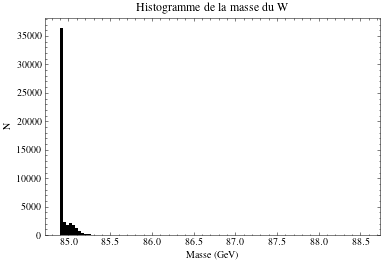

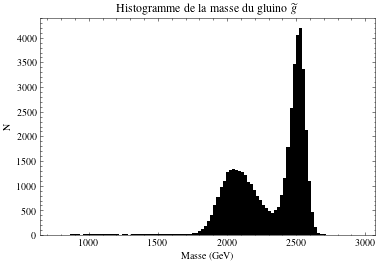

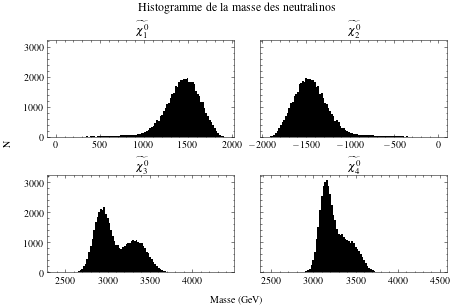

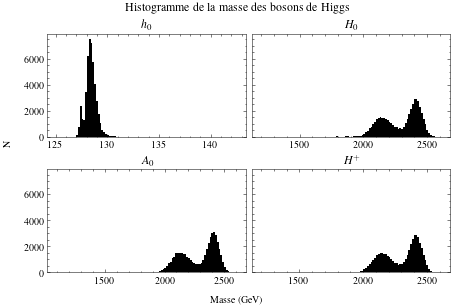

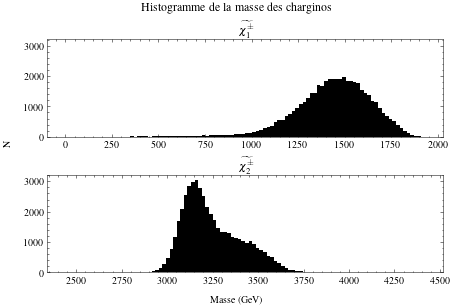

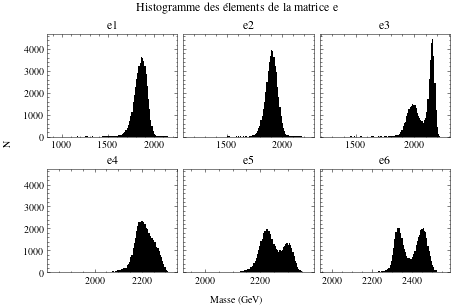

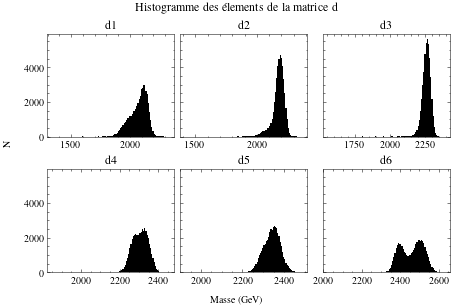

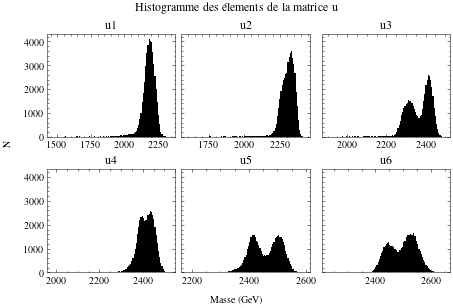

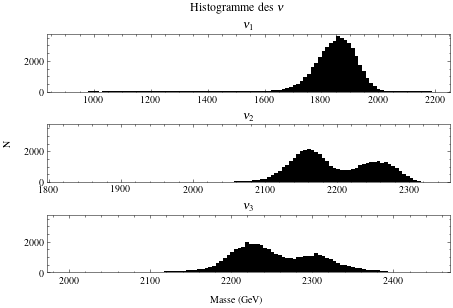

In [12]:
folder = 'Advanced NN/NMFV/NMFV_run/'+folder_name

file = '/histo_W.svg'
titre = r'Histogramme de la masse du W'
xlabel = 'Masse (GeV)'
ylabel = 'N'
plot_histo(titre,xlabel,ylabel,[MW_mass],100,['NN'],save=True,file_folder=folder+file)

file = '/histo_g.svg'
titre = r'Histogramme de la masse du gluino $\widetilde{g}$'
plot_histo(titre,xlabel,ylabel,[g_mass],100,['NN'],save=True,file_folder=folder+file)

file = '/histo_neutralinos.svg'
titre = 'Histogramme de la masse des neutralinos'
subtitle = [r'$\widetilde{\chi_1^0}$',r'$\widetilde{\chi_2^0}$',r'$\widetilde{\chi_3^0}$',r'$\widetilde{\chi_4^0}$']
share = [False,True]
subplot_histo(titre,xlabel,ylabel,2,2,share,subtitle,[neutralino_mass],['NN'],save=True,file_folder=folder+file)

file = '/histo_higgs.svg'
titre = 'Histogramme de la masse des bosons de Higgs'    
subtitle = [r'$h_0$',r'$H_0$',r'$A_0$',r'$H^+$']
subplot_histo(titre,xlabel,ylabel,2,2,share,subtitle,[higgs_mass],['NN'],save=True,file_folder=folder+file)

file = '/histo_charginos.svg'
titre = 'Histogramme de la masse des charginos'    
subtitle = [r'$\widetilde{\chi_1^\pm}$',r'$\widetilde{\chi_2^\pm}$']
subplot_histo(titre,xlabel,ylabel,2,1,share,subtitle,[chargino_mass],['NN'],save=True,file_folder=folder+file)

file = '/histo_e.svg'
titre = 'Histogramme des élements de la matrice e'    
subtitle = ['e1','e2','e3','e4','e5','e6']
subplot_histo(titre,xlabel,ylabel,2,3,share,subtitle,[e_mass],['NN'],save=True,file_folder=folder+file)

file = '/histo_d.svg'
titre = 'Histogramme des élements de la matrice d'    
subtitle = ['d1','d2','d3','d4','d5','d6']
subplot_histo(titre,xlabel,ylabel,2,3,share,subtitle,[d_mass],['NN'],save=True,file_folder=folder+file)

file = '/histo_e.svg'
titre = 'Histogramme des élements de la matrice u'    
subtitle = ['u1','u2','u3','u4','u5','u6']
subplot_histo(titre,xlabel,ylabel,2,3,share,subtitle,[u_mass],['NN'],save=True,file_folder=folder+file)

file = '/histo_nu.svg'
titre = r'Histogramme des $\nu$'    
subtitle = [r'$\nu_1$',r'$\nu_2$',r'$\nu_3$']
subplot_histo(titre,xlabel,ylabel,3,1,share,subtitle,[nu_mass],['NN'],save=True,file_folder=folder+file)

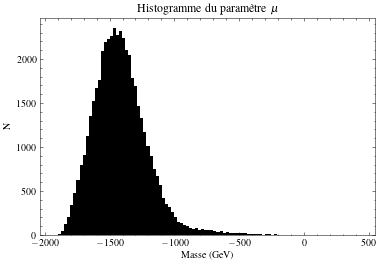

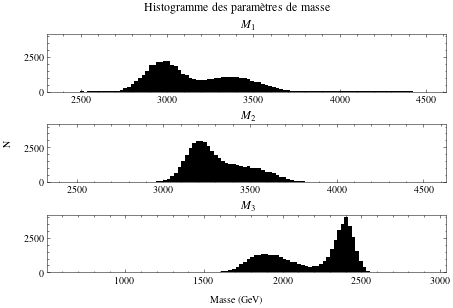

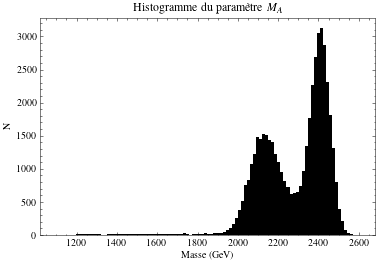

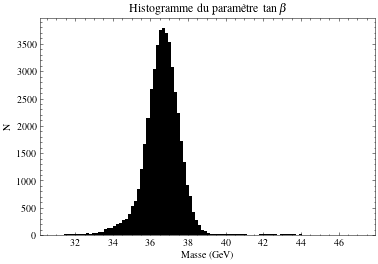

In [13]:
file = '/histo_mu.svg'
titre = r'Histogramme du paramètre $\mu$'
plot_histo(titre,xlabel,ylabel,[mu_param],100,['NN'],save=True,file_folder=folder+file)

file = '/histo_M.svg'
titre = 'Histogramme des paramètres de masse'
subtitle = [r'$M_1$',r'$M_2$',r'$M_3$']
subplot_histo(titre,xlabel,ylabel,3,1,share,subtitle,[M_param],['NN'],save=True,file_folder=folder+file)

file = '/histo_mA.svg'
titre = r'Histogramme du paramètre $M_A$'
plot_histo(titre,xlabel,ylabel,[mA_param],100,['NN'],save=True,file_folder=folder+file)

file = '/histo_tanb.svg'
titre = r'Histogramme du paramètre $\tan \beta$'
plot_histo(titre,xlabel,ylabel,[tanB_param],100,['NN'],save=True,file_folder=folder+file)

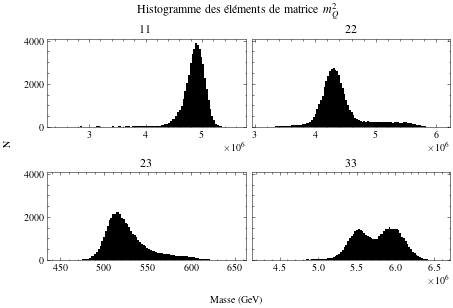

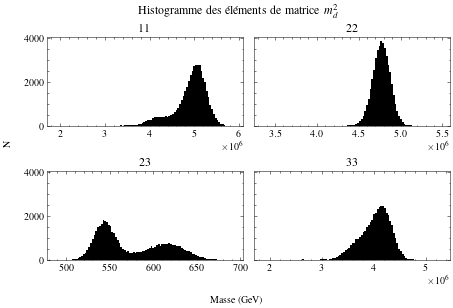

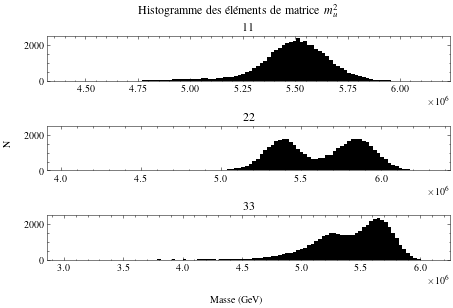

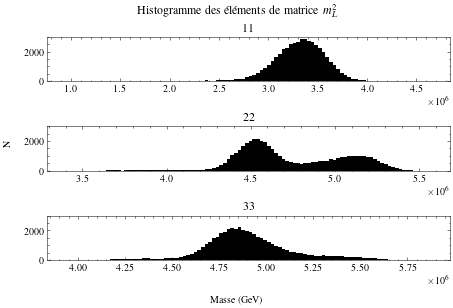

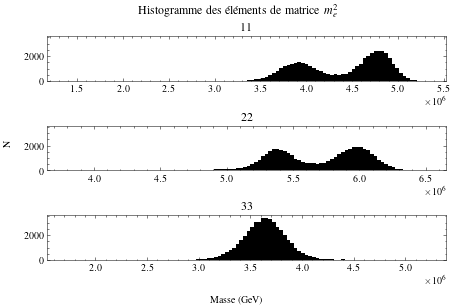

In [14]:
file = '/histo_msq2.pdf'
titre = r'Histogramme des éléments de matrice $m^2_Q$'
subtitle = ['11','22','23','33']
subplot_histo(titre,xlabel,ylabel,2,2,share,subtitle,[msq2_param],['NN'],save=True,file_folder=folder+file)

file = '/histo_msd2.pdf'
titre = r'Histogramme des éléments de matrice $m^2_d$'
subtitle = ['11','22','23','33']
subplot_histo(titre,xlabel,ylabel,2,2,share,subtitle,[msd2_param],['NN'],save=True,file_folder=folder+file)

file = '/histo_msu2.pdf'
titre = r'Histogramme des éléments de matrice $m^2_u$'
subtitle = ['11','22','33']
subplot_histo(titre,xlabel,ylabel,3,1,share,subtitle,[msu2_param],['NN'],save=True,file_folder=folder+file)

file = '/histo_msl2.pdf'
titre = r'Histogramme des éléments de matrice $m^2_L$'
subtitle = ['11','22','33']
subplot_histo(titre,xlabel,ylabel,3,1,share,subtitle,[msl2_param],['NN'],save=True,file_folder=folder+file)

file = '/histo_mse2.pdf'
titre = r'Histogramme des éléments de matrice $m^2_e$'
subtitle = ['11','22','33']
subplot_histo(titre,xlabel,ylabel,3,1,share,subtitle,[mse2_param],['NN'],save=True,file_folder=folder+file)

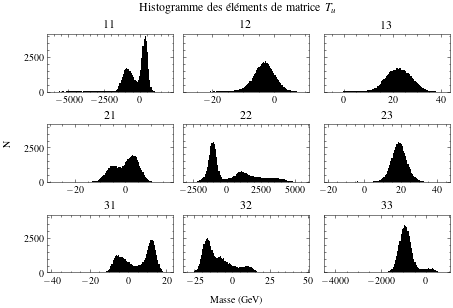

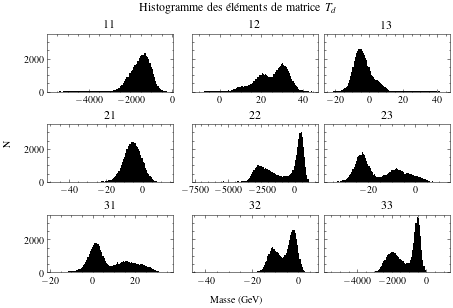

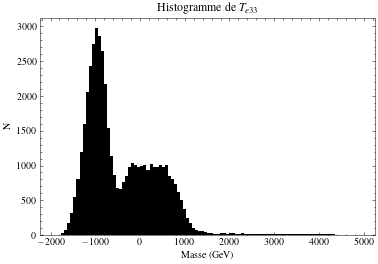

In [15]:
file = '/histo_tu.pdf'
titre = r'Histogramme des éléments de matrice $T_u$'
subtitle = ['11','12','13','21','22','23','31','32','33']
subplot_histo(titre,xlabel,ylabel,3,3,share,subtitle,[tu_param],['NN'],save=True,file_folder=folder+file)

file = '/histo_td.pdf'
titre = r'Histogramme des éléments de matrice $T_d$'
subtitle = ['11','12','13','21','22','23','31','32','33']
subplot_histo(titre,xlabel,ylabel,3,3,share,subtitle,[td_param],['NN'],save=True,file_folder=folder+file)

file = '/histo_te.svg'
titre = r'Histogramme de $T_{e33}$'
plot_histo(titre,xlabel,ylabel,[te_param],100,['NN'],save=True,file_folder=folder+file)

In [16]:
print('Statisique du Neural Network')
print("Nombre d'échecs:",ratio[0])
print("Nombre de succes:",ratio[1])
print('Nombre warning:', warning)
print('Éfficacité du AL:',100*ratio[1]/(ratio[0]+ratio[1]),'%')
print('\n')

Statisique du Neural Network
Nombre d'échecs: 2498
Nombre de succes: 47502
Nombre warning: 0
Éfficacité du AL: 95.004 %


